In [23]:
import pandas as pd

def read_market_data(fileName):
    df = pd.read_csv(fileName).fillna("")
    cols = df.columns.tolist()[0].split(';')
    fin = pd.DataFrame(df.iloc[:,0].apply(lambda x: x.split(';')).values.tolist(),columns= cols)
    to_float_cols = ['day','timestamp','bid_price_1','bid_volume_1','bid_price_2','bid_volume_2','bid_price_3','bid_volume_3','ask_price_1','ask_volume_1','ask_price_2','ask_volume_2','ask_price_3','ask_volume_3','mid_price','profit_and_loss']
    fin[to_float_cols] =  fin[to_float_cols].applymap(lambda x: float(x) if x != '' else '')
    return fin

def split_data_by_product(df):
    markets = dict()
    products  = df['product'].unique().tolist()
    for prod in products:
        markets[prod]= df[df['product']==prod]
    return markets

In [24]:
data = read_market_data('r4.csv')
markets = split_data_by_product(data)
S1 = markets['BAGUETTE']['mid_price']
S2 = markets['DIP']['mid_price']
S3 = markets['UKULELE']['mid_price']
S4 = markets['PICNIC_BASKET']['mid_price']

In [25]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt


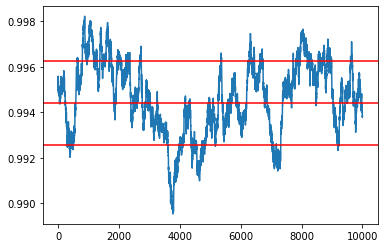

In [26]:
S2 = list(S2)
S1 = list(S1)
S3 = list(S3)
S4 = list(S4)
# S1 = [i * b for i in S1]
combined = [2 * S1[i] + 4 * S2[i] + S3[i]  for i in range(len(S1))]
plt.plot([combined[i]/S4[i] for i in range(len(S1))])
og = 0.9944
plusminus = 0.00185
plt.axhline(y = og, color = 'r', linestyle = '-')
plt.axhline(y = og+plusminus, color = 'r', linestyle = '-')
plt.axhline(y = og-plusminus, color = 'r', linestyle = '-')

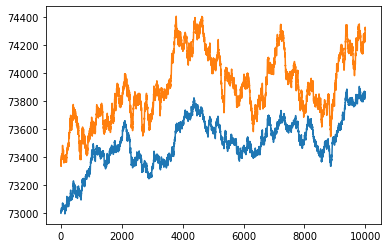

In [31]:
plt.plot(combined)
plt.plot(S4)

In [28]:
plt.plot(spread)

NameError: name 'spread' is not defined